# Mapping Geographical data on Polarstereographic projected map

> notebook filename \| reprojecting\_satellite\_buoy\_data.Rmd  
> history \| Create Mar 2023 

<a href="https://polarwatch.noaa.gov/" target="_blank">NOAA PolarWatch</a> distributes gridded and tabular oceanographic data for polar regions.  Satellite data include geospatial information and most of them are in geographical coordinates (latitude and longitude).  PolarWatch satellite data are often projected using <a href="https://nsidc.org/data/user-resources/help-center/guide-nsidcs-polar-stereographic-projection">Polar Stereographic Projections</a> in x and y coordinates.

In this exercise, we will first plot stereographic projected data on the map with the stereographic projection.  Then we will add the data in geographical coordinates (latitude and longitude) onto the projected map.

**The exercise demonstrates the following techniques:**
-   Accessing satellite data from ERDDAP
-   Making a projected map
-   Adding projected data
-   Adding geographical data

**Datasets used:**
-   sea ice data (stereographic projection)
-   polar bear tracking data (graphical reference) 

**Python packages used:**
-   netCDF4 (reading data in netCDF format)
-   matplotlib (ploting maps)
-   cartopy (projection)
-   pandas (data analysis)


## Import  packages

In [2]:
import netCDF4 as nc
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
 

## Sea Ice Concentration Data

To demonstrate mapping of the steoreographic projected data on the projected map, we will use NSIDC Sea Ice Concentration data from passive microwave sensors.  

**Data**

*Sea Ice Concentration*, NOAA/NSIDC Climate Data Record V4, Northern Hemisphere, 25km, Science Quality, 1978-Present, Monthly

**Brief description**  

This dataset includes sea ice concentration data from the northern hemisphere, and is produced by the NOAA/NSIDC using the Climate Data Record algorithm.  The resolution is 25km, meaning each grid in this data set represents a value that covers a 25km by 25km area.  

The time series data product includes data from 1978 to present.  The dataset we will be using for this exercise is the monthly composite, meaning data were aggregated by month.

**Userful links**

-   <a href="https://nsidc.org/data/g02202/versions/4">NSIDC Data Product Description</a>
-   <a href="https://nsidc.org/sites/default/files/g02202-v004-userguide_1_1.pdf">NSIDC Data Product User Guide (pdf)</a>
-   <a href="https://polarwatch.noaa.gov/catalog/ice-sq-nh-nsidc-cdr-v4/preview/?dataset=daily&var=cdr_seaice_conc&time_min=2022-05-31T00:00:00Z&time_max=2022-05-31T00:00:00Z&proj=epsg3413&colorBar=KT_ice|||0|1|">NOAA PolarWatch Data Product Page (download, preview)</a>








In [5]:
# There are many ways to get data.  We will create a function that points to 
# NOAA PolarWatch ERDDAP Server gridded dataset page to get data with its unique ID

def point_to_dataset(dataset_id, base_url='https://polarwatch.noaa.gov/erddap/griddap'):
    base_url = base_url.rstrip('/')
    full_url = '/'.join([base_url, dataset_id])
    return nc.Dataset(full_url)
 

# 'nsidcG02202v4nhmday' is the unique ID of our interested data 
# from PolarWatch ERDDAP data server
da = point_to_dataset('nsidcG02202v4nhmday')


## Mapping projected data on a projected basemap

We first need to create a basemap with the Polar Stereographic projection. Most of the netCDF data files include  metadata that describe mapping and coordinate reference system information.  This can be used to set a projection and mapping boundaries for the data.

In [7]:
# prints metadata embedded in netCDF file
print(da)

In [19]:
# prints variable names
da.variables.keys()

dict_keys(['time', 'ygrid', 'xgrid', 'cdr_seaice_conc_monthly', 'melt_onset_day_cdr_seaice_conc_monthly', 'nsidc_bt_seaice_conc_monthly', 'nsidc_nt_seaice_conc_monthly', 'qa_of_cdr_seaice_conc_monthly', 'stdev_of_cdr_seaice_conc_monthly'])

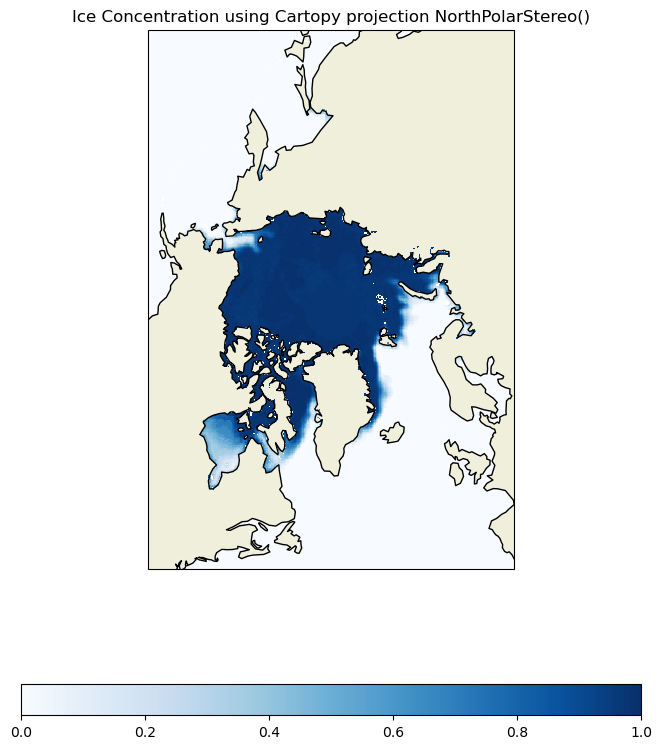

In [28]:
# MAPPING USING PROJECTION CARTOPY POLAR_STEREOGRAPHIC
# TODO https://scitools.org.uk/cartopy/docs/v0.15/crs/projections.html#northpolarstereo

#  netCDF metadata 
# 'grid_mapping_name': 'polar_stereographic'
#  'grid_mapping_latitude_of_projection_origin': 90.0,
#  'grid_mapping_longitude_of_projection_origin': -45.0,
#  'grid_mapping_grid_boundary_bottom_projected_y': -5350000.0,
#  'grid_mapping_grid_boundary_left_projected_x': -3850000.0,
#  'grid_mapping_grid_boundary_right_projected_x': 3750000.0,
#  'grid_mapping_grid_boundary_top_projected_y': 5850000.0,
#  'proj_crs_code': 'EPSG:3411',

# set the mapping specification using the metadata provided in netCDF file

# map crs: North Polar Stereo graphic
crs_epsg = ccrs.NorthPolarStereo(central_longitude=-45)
# set figure size
fig = plt.figure(figsize=[10, 10])

# set the map projection and associated boundaries
ax = plt.axes(projection = crs_epsg)
ax.set_extent([-3850000.0, 3750000.0, -5350000, 5850000.0],crs_epsg)
ax.coastlines()
ax.add_feature(cfeature.LAND)

# set the data projection using 'transform'
cs = ax.pcolormesh(da['xgrid'], da['ygrid'], da['cdr_seaice_conc_monthly'][0][:] , 
                   cmap=plt.cm.Blues,  transform= ccrs.NorthPolarStereo(true_scale_latitude=70, central_longitude=-45)) #transform default is basemap specs

fig.colorbar(cs, ax=ax, location='bottom', shrink =0.8)
cs = ax.set_title('Ice Concentration using Cartopy projection NorthPolarStereo()')

plt.show()

## Mapping data with EPSG Code

You can also use the EPSG code to refer to which projection data are in.  In our case, the metadata provides the projection crs (coordinate reference system) code: 3411.

>  'proj_crs_code': 'EPSG:3411'

In this exercise, we will use the same basemap projection, but set the data projection with the EPSG code.


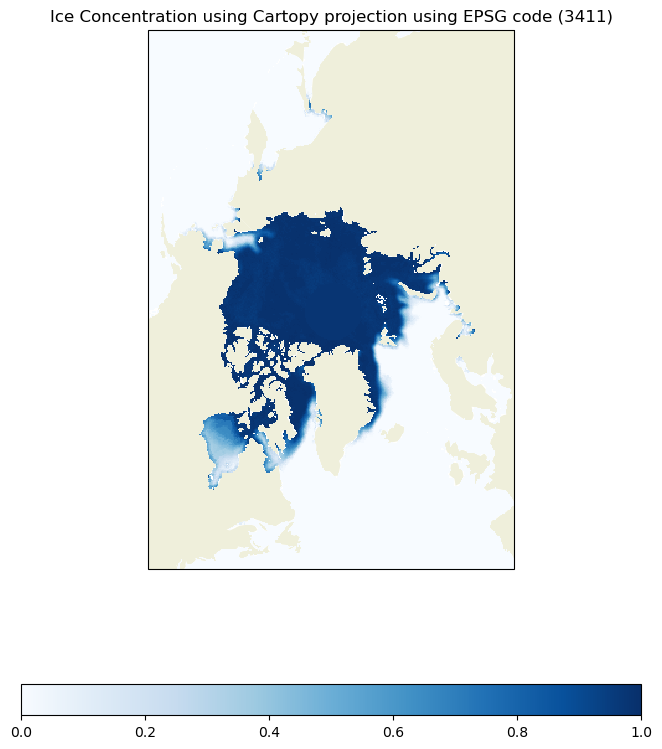

In [42]:
# Set data projection using EPSG Code 
crs_epsg = ccrs.epsg('3411')
fig2 = plt.figure(figsize=[10, 10])
ax2 = plt.axes(projection = ccrs.NorthPolarStereo(central_longitude=-45))

# Set map projection
ax2.set_extent([-3850000.0, 3750000.0, -5350000, 5850000.0],ccrs.NorthPolarStereo(central_longitude=-45))
ax2.add_feature(cfeature.LAND)

# transform= which projection data (coords) were defined 
cs2 = ax2.pcolormesh(da['xgrid'], da['ygrid'], da['cdr_seaice_conc_monthly'][0][:], 
                   cmap=plt.cm.Blues,  transform= crs_epsg) 

fig.colorbar(cs2, ax=ax2, location='bottom', shrink =0.8)
cs2 = ax2.set_title('Ice Concentration using Cartopy projection using EPSG code (3411)')

plt.show()

# Adding non-projected data with lat and lon to the projected map

To demonstrate mapping non-projected data onto the projected map, we will use polar bear tracking data. While the temporal coverage of the two datasets differ (*sea ice concentration* and *polarbear locations*), the exercise is to show how to use data with latitude and longitude onto the projected basemap.

Data:  Polar bear tracking data

Dataset: https://borealisdata.ca/file.xhtml?fileId=151017&version=1.0

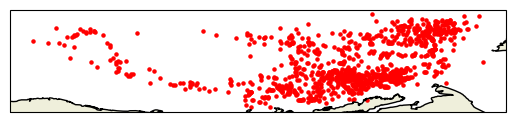

In [111]:
import pandas as pd

df = pd.read_csv('data/PB_Argos.csv')


df = df[df["QualClass"].isin(["B"])]
fig = plt.figure() 
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
ax.add_feature(cfeature.LAND)


plt.scatter(
    y=df["Lat"],
    x=df["Lon"],
    color="red",
    s=5,
    alpha=1,
    transform=ccrs.PlateCarree()
)


plt.show()



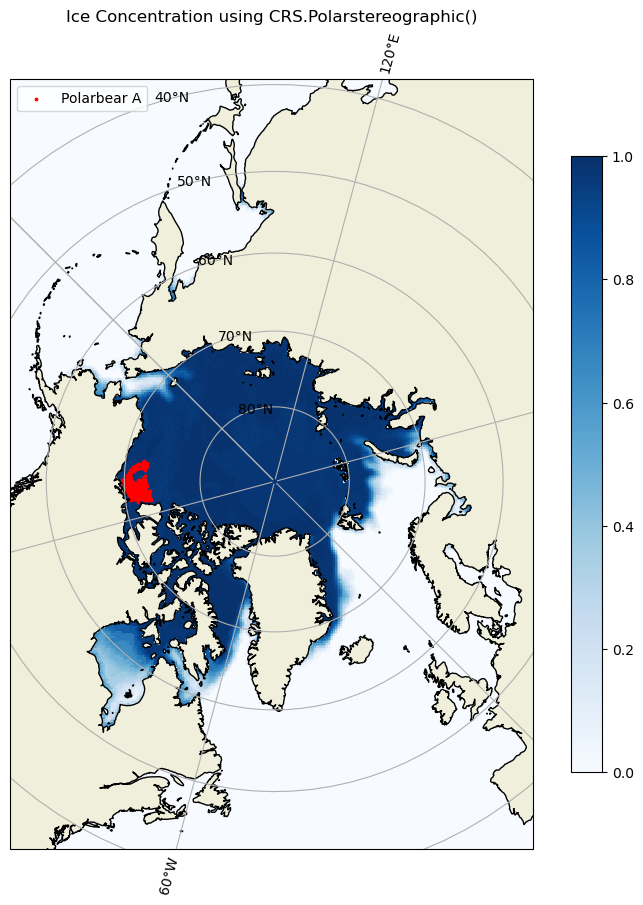

In [128]:

crs = ccrs.NorthPolarStereo(central_longitude=-45)

fig = plt.figure(figsize=[10, 10])


ax1 = plt.axes(projection=crs)
ax1.add_feature(cfeature.LAND)
ax1.coastlines(resolution='50m')
ax1.set_extent([-3850000.0, 3750000.0, -5350000.0, 5850000.0],crs_epsg )
ax1.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=True)

cs = ax1.pcolormesh(da['xgrid'], da['ygrid'], da['cdr_seaice_conc_monthly'][0][:] , 
                   cmap=plt.cm.Blues,  transform= ccrs.NorthPolarStereo(true_scale_latitude=70, central_longitude=-45))


scatter = plt.scatter(
    y=df["Lat"],
    x=df["Lon"],
    color="red",
    s=3,
    alpha=1,
    transform=ccrs.PlateCarree()
)
fig.colorbar(cs, ax=ax1, location='right', shrink =0.8)

plt.legend(["Polarbear A"], loc = "upper left")

ax1.set_title('Ice Concentration using CRS.Polarstereographic()')


plt.show()

## Related Materials

-    <a href="#">R Tutorial is available for the same content</a>
-    <a href="#">How to read metadata from netCDF using python</a>


